### The Sparks Foundation - GRIP - Data Science and Business Analytics

#### Task 1: prediction using Supervised ML

**AIM:** predict the percentage of a student based on the number of study hours 

**LANGUAGE USED:** Python 3 

**IDE:** Jupyter Notebook

**TYPE:** Linear Regression

**AUTHOR:** Anupuri Noorulla


#### STEPS TO BE FOLLOWED:

 - step 1 : Import the dataset
 - step 2 : Visualize and analyze the Dataset
 - step 3 : Prepare the Data 
 - step 4 : Design and Train the Machine Learning Model
 - step 5 : visualize the Model 
 - step 6 : Make Predictions 
 - step 7 : Evaluate the Model 
 
 
 ### Step 1: Import the Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the csv dataset as a pandas dataframe
url="http://bit.ly/w-data"
student_data = pd.read_csv(url)

print("Data imported successfully")
student_data 

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
student_data.shape 

#here we can see that there are 25 and 2 columns in the dataset

(25, 2)

In [4]:
(25,2)

(25, 2)

In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
student_data.isnull().sum()
#here we can see that there are no Null values in the datase that can affect the training of our algorithm 

Hours     0
Scores    0
dtype: int64

### step 2: Visualize and Analyze the Dataset

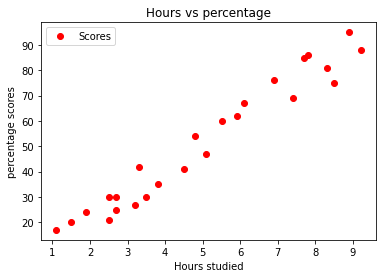

In [7]:
# ploting the distribution of scores and number of hours studied on a 2D graph

student_data.plot(x='Hours', y='Scores', style='ro')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('percentage scores')
plt.show()

### step 3:Prepare the Data

In [8]:
# we are extacting values of hours Data into variable x and the values of Scores Data into variable y
x=student_data.iloc[:, :-1].values
y=student_data.iloc[:, 1].values

In [9]:
# Number of hours studied
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
# Scores obtained
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
# we now split the data into train datasets using Scikit-Learn's built-in train_test_split()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test=train_test_split(x, y,test_size=0.2, random_state=0)



In [12]:
x_train


array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [13]:
x_test


array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [14]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [15]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### step 4: Design and Train the Machine Learining Model

In [16]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete.")

Training complete.


### step 5:Visualize the Model

<function matplotlib.pyplot.show(close=None, block=None)>

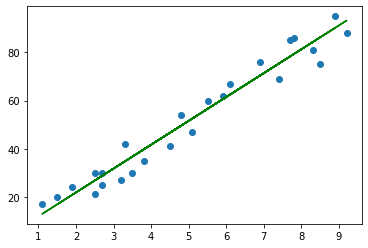

In [17]:
# plotting the regression line 
line = regressor.coef_*x+regressor.intercept_

# plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color='green');
plt.show

### step 6:Make Predictions

In [18]:
print(x_test) #Testing data -In hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test, 'predicted': y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# Testing with custom data of 9.25 hrs/day

hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours ={hours}")
print(f"predicted score ={own_pred[0]}")

No of Hours =9.25
predicted score =93.69173248737538


### step 7: Evaluate the Model

it is important to evaluate the perform of algorithm to compare how well differnt perform on a paricular dataset 


#### Mean Absolute Error

In [22]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


#### Max Error

In [24]:
print('Max Error:', metrics.max_error(y_test,y_pred))

Max Error: 6.732260779489842


#### Mean Squared Error 

In [25]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174
